## Objective: To Predict Severity of an Accident in France

### By Edwin Mogondo

### Data is from 2005-2016 from Kaggle.com

*To achieve this data from [https://www.kaggle.com/](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016) will be used.*


*There are three csv files that will be used for this purpose:*

1. Characteristics datasets: caracteristics.csv.csv
2. Users datasets: users.csv
3. Places datasets: places.csv

## Important acronyms

1. **grav**: *severity*
2. **Num_Acc**: *Identification number*
3. **catr**: *road category*
4. **circ**: *traffic regime*
5. **nbv**: *number of traffic lane*
6. **surf**: *surface conditon*
7. **infra**: *infrastructure*
8. **hrmn**: *month, day, time*
9. **int**: *intersection*
10. **atm**: *atmospheric condition*
11. **dep**: *department*
12. **agg**: *agglomeration*
13. **lum**: *lighting condition*

*According to the existing kernels on kaggle.com the term 'grav' in the users.csv dataset, represents a measure of severity of an accident. This is what will be predicted knowing all other features (characteristics).*


### Loading important Python Libaries

In [420]:
#Importing important libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


## Importing Data and Exploration

### Characteristics Data

In [421]:
#importing caracteristics.csv
char_df = pd.read_csv("data/caracteristics.csv", encoding="latin-1")
char_df.head()

C:\Python\capstone\my_project\Lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [422]:
#shape of data
char_df.shape

(839985, 16)

##### There are 839985 Instances and 16 attributes.

In [423]:
#Data types
char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


In [424]:
#Visualization of data
char_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


### User Data

In [425]:
#Loading users data
users_df = pd.read_csv("data/users.csv")
users_df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [426]:
#shape of data
users_df.shape

(1876005, 12)

##### There are 1876005 users .

In [427]:
#Data types
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876005 entries, 0 to 1876004
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   place    float64
 2   catu     int64  
 3   grav     int64  
 4   sexe     int64  
 5   trajet   float64
 6   secu     float64
 7   locp     float64
 8   actp     float64
 9   etatp    float64
 10  an_nais  float64
 11  num_veh  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 171.8+ MB


In [428]:
#Visualization of data
users_df.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.876005e+06,1.775639e+06,1.876005e+06,1.876005e+06,1.876005e+06,1.875636e+06,1.832547e+06,1.874341e+06,1.874232e+06,1.874299e+06,1.873654e+06
mean,2.009992e+11,1.283953e+00,1.341410e+00,2.513080e+00,1.328885e+00,3.075555e+00,1.822304e+01,2.242522e-01,2.762860e-01,1.023823e-01,1.972682e+03
std,3.464316e+08,9.058402e-01,6.334311e-01,1.332745e+00,4.698081e-01,2.676239e+00,1.977354e+01,8.722973e-01,1.051576e+00,3.800489e-01,1.834448e+01
min,2.005000e+11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.896000e+03
25%,2.007000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.961000e+03
50%,2.010000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03
75%,2.013000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.987000e+03
max,2.016001e+11,9.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,8.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03


### Places Data

In [429]:
#Loading places data
places_df = pd.read_csv("data/places.csv")
places_df.head()


C:\Python\capstone\my_project\Lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [430]:
#shape of data
places_df.shape

(839985, 18)

In [431]:
#Data types
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839187 non-null  float64
 6   nbv      838195 non-null  float64
 7   pr       414770 non-null  float64
 8   pr1      413463 non-null  float64
 9   vosp     838345 non-null  float64
 10  prof     838924 non-null  float64
 11  plan     838909 non-null  float64
 12  lartpc   830440 non-null  float64
 13  larrout  831706 non-null  float64
 14  surf     838968 non-null  float64
 15  infra    838707 non-null  float64
 16  situ     838983 non-null  float64
 17  env1     838709 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 115.4+ MB


In [432]:
#Visualization of data
places_df.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


# Preprocessing Data

## User Data


* Intend is to use keep 'grav' and drop the other columns.

In [433]:
#Dropping all other features
users_df = users_df.drop(["place", "catu", "sexe", "trajet", "secu", "locp", "actp", "etatp", "an_nais", "num_veh"], axis=1)
users_df.head()

,Num_Acc,grav
0,201600000001,1
1,201600000001,3
2,201600000002,3
3,201600000002,3
4,201600000002,3


* Change the name 'grav' to be more understandable to everyone

In [434]:
users_pd = pd.DataFrame(users_df)
users_pd.rename(columns = {'grav':'severity'}, inplace = True) 
users_pd.describe()

,Num_Acc,severity
count,1.876005e+06,1.876005e+06
mean,2.009992e+11,2.513080e+00
std,3.464316e+08,1.332745e+00
min,2.005000e+11,1.000000e+00
25%,2.007000e+11,1.000000e+00
50%,2.010000e+11,3.000000e+00
75%,2.013000e+11,4.000000e+00
max,2.016001e+11,4.000000e+00


In [435]:
#Number of deaths caused by accidents from 2005_2016
number_of_deaths = (users_pd['severity'] == 2).sum()
print("Number of deaths: ", number_of_deaths )

Number of deaths:  50589


*Severity feature is categorical data as follows:*
* 1: Unscathed
* 2: Killed
* 3: Serious injury
* 4: Light injury

### Plot a histogram 

<AxesSubplot:>

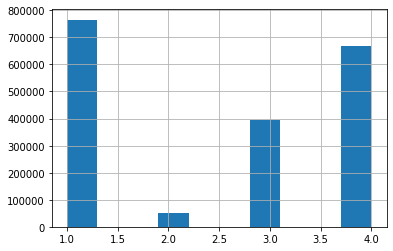

In [436]:
users_pd.severity.hist()

*Transform severity feature into binary by grouping unscathed and light injury  and serious and death as follows:*

*unscathed and light = 0*

*seriour and killed = 1*

<AxesSubplot:>

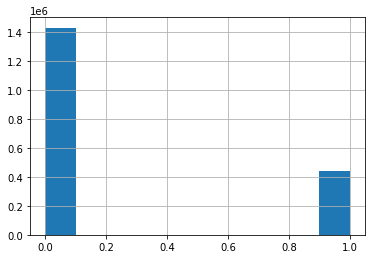

In [437]:
users_pd = users_pd.replace(1,0)
users_pd = users_pd.replace(3,1)
users_pd = users_pd.replace(4,0)
users_pd = users_pd.replace(2,1)

users_pd.severity.hist()

#### Grouping the data

<AxesSubplot:>

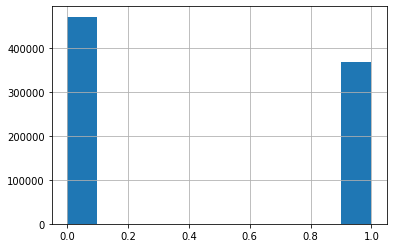

In [438]:
#Using groupby
users_pd = users_pd.groupby(['Num_Acc'], as_index=False).max()
users_pd.severity.hist()

*Confirm number of instaces in the data base*

In [439]:
users_pd.count()

Num_Acc     839985
severity    839985
dtype: int64

In [440]:
users_pd.head(20)

,Num_Acc,severity
0,200500000001,1
1,200500000002,1
2,200500000003,1
3,200500000004,1
4,200500000005,1
5,200500000006,1
6,200500000007,0
7,200500000008,1
8,200500000009,1
9,200500000010,1


## Places

*Selecting features*

*Keeping : road categories, traffic regime, number of traffic lanes, surface conditions, and infrastructure and drop remaining cloumns.*

In [441]:
places_df = places_df.drop(["v1", "voie", "v2", "pr", "pr1", "vosp", "prof", "plan", "lartpc", "larrout", "situ", "env1"], axis=1)
places_df.describe()

,Num_Acc,catr,circ,nbv,surf,infra
count,8.399850e+05,839984.000000,839187.000000,838195.000000,838968.000000,838707.000000
mean,2.010011e+11,3.418247,1.855246,2.039593,1.257012,0.438958
std,3.458009e+08,1.207917,0.720949,1.550779,0.954748,1.350905
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000,0.000000
max,2.016001e+11,9.000000,4.000000,99.000000,9.000000,7.000000


**Explore the data**

In [442]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   circ     839187 non-null  float64
 3   nbv      838195 non-null  float64
 4   surf     838968 non-null  float64
 5   infra    838707 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 38.5 MB


**Replacing missing values**

*'catr' replace with the mean* 

In [443]:
places_df["catr"].isna().sum()

1

In [444]:
places_df["catr"].mean()

3.418247252328616

In [445]:
places_df["catr"] = places_df["catr"].fillna(3)

In [446]:
places_df["catr"] = places_df["catr"].astype(int)

*'circ' replace with the frequently occuring number*

<AxesSubplot:>

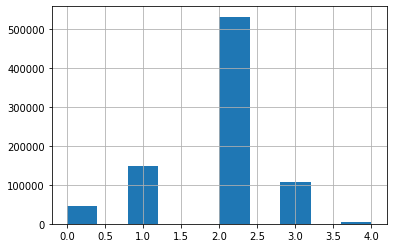

In [447]:
places_df["circ"].hist()

In [448]:
places_df["circ"].isna().sum()

798

In [449]:
(places_df["circ"] == 0).sum()

44556

In [450]:
places_df["circ"] = places_df["circ"].fillna(2)
places_df["circ"] = places_df["circ"].replace(0,2)
places_df["circ"] = places_df["circ"].astype(int)

*'nbv' feature*


<AxesSubplot:>

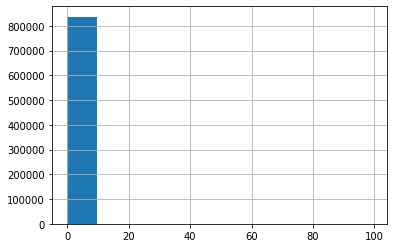

In [451]:
places_df["nbv"].hist()

In [452]:
#Missing values of 'nbv'
places_df["nbv"].isna().sum()

1790

In [453]:
#Average 'nbv'
places_df["nbv"].mean()

2.0395934120341925

In [454]:
#Checking for outliers
places_df["nbv"] = places_df["nbv"].where(places_df["nbv"] < 6,0)

In [455]:
#Checking where 'nbv' = 0
(places_df["nbv"] == 0).sum()

122899

<AxesSubplot:>

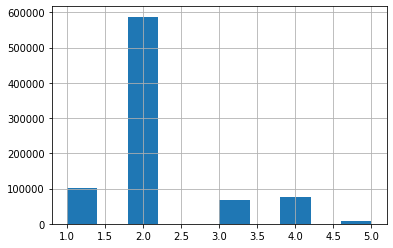

In [456]:
#Replacing the 0s with mean and ploting the distribution
places_df["nbv"] = places_df["nbv"].fillna(2)
places_df["nbv"] = places_df["nbv"].replace(0,2)
places_df["nbv"] = places_df["nbv"].astype(int)
places_df["nbv"].hist()

*'surf' feature*

<AxesSubplot:>

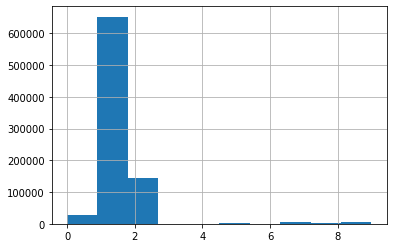

In [457]:
#Explore this feature
places_df["surf"].hist()

In [458]:
#Check for null vallues
places_df["surf"].isna().sum()

1017

In [459]:
#Check for 0s
(places_df["surf"] == 0).sum()

26998

In [460]:
#Check for average
places_df["surf"].mean()

1.2570121864004349

In [461]:
#Check for frequency of 1
(places_df["surf"] == 1).sum()

652322

In [462]:
#Replace missing values with a 1 based on frequency and mean
places_df["surf"] = places_df["surf"].fillna(1)
places_df["surf"] = places_df["surf"].replace(0,1)
places_df["surf"] = places_df["surf"].astype(int)

<AxesSubplot:>

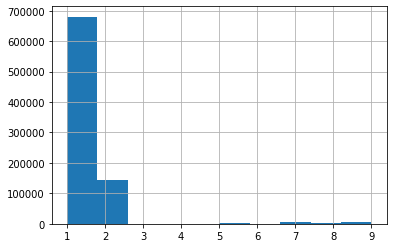

In [463]:
places_df["surf"].hist()

*'infra' feature*

<AxesSubplot:>

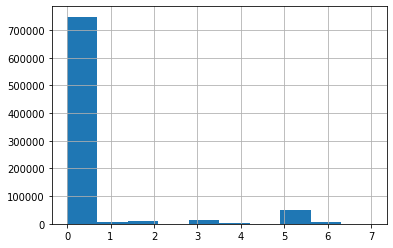

In [464]:
places_df["infra"].hist()


In [465]:
#Check for 0s
(places_df["infra"] == 0).sum()

747965

In [466]:
#Drop the feature since 90% > 0
places_df = places_df.drop(["infra"], axis=1)

In [467]:
#Checking for "Cleanliness"
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  839985 non-null  int64
 1   catr     839985 non-null  int32
 2   circ     839985 non-null  int32
 3   nbv      839985 non-null  int32
 4   surf     839985 non-null  int32
dtypes: int32(4), int64(1)
memory usage: 19.2 MB


In [468]:
#Checking to see all column are in place
places_df.describe()

,Num_Acc,catr,circ,nbv,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,3.418247,1.961471,2.169398,1.288842
std,3.458009e+08,1.207916,0.571444,0.788149,0.927817
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,9.000000,4.000000,5.000000,9.000000


## Characteristics

In [469]:
#Checking the columns
char_df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


**Keep month, day of the month, time, agglomeration, intersection, atmospheric condition and department and drop the rest**

In [470]:
#Dropping columns
char_df = char_df.drop(["an", "col", "com", "adr", "gps", "lat", "long"], axis=1)
char_df.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,564.257671
std,3.458009e+08,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,291.153083
min,2.005000e+11,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000
25%,2.007000e+11,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,310.000000
50%,2.010000e+11,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,630.000000
75%,2.013000e+11,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,780.000000
max,2.016001e+11,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,976.000000


In [471]:
#Checking data info
char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   mois     839985 non-null  int64  
 2   jour     839985 non-null  int64  
 3   hrmn     839985 non-null  int64  
 4   lum      839985 non-null  int64  
 5   agg      839985 non-null  int64  
 6   int      839985 non-null  int64  
 7   atm      839930 non-null  float64
 8   dep      839985 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 57.7 MB


**Clean row 7 & 8**

**"atm" feature**

In [472]:
#Missing values
char_df["atm"].isna().sum()
print(f"Number of missing values: {char_df['atm'].isna().sum()}")

Number of missing values: 55


In [473]:
#Replace with the most frequent number
char_df["atm"] = char_df["atm"].fillna(1)
char_df["atm"] = char_df["atm"].astype(int)
print(f"Number of missing values is: {char_df['atm'].isna().sum()}")

Number of missing values is: 0


**"int" feature**

In [474]:
#Missing values
(char_df["int"]== 0).sum()
print(f"Number of missing values: {(char_df['int']==0).sum()}")

Number of missing values: 106


In [475]:
#Replace missing values with 1 which is the most frequently observed
char_df["int"] = char_df["int"].replace(0,1)
print(f"Number of missing values: {(char_df['int']==0).sum()}")

Number of missing values: 0


**"hrmn" feature**

In [476]:
#We use just hour for this and not minutes
char_df["hrmn"] = char_df["hrmn"].div(100).apply(np.floor)
char_df["hrmn"] = char_df["hrmn"].astype(int)

<AxesSubplot:>

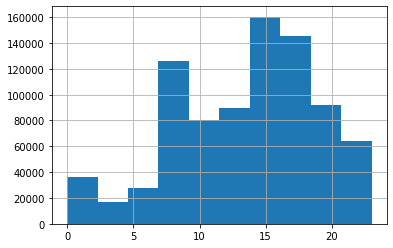

In [477]:
#Plot a histogram to obeserve distribution
char_df["hrmn"].hist()

**"dep" feature**

In [478]:
#Skip precision and keep the department on a range 1 to 97 with 2 digits
char_df["dep"] = char_df["dep"].div(10).apply(np.floor)
char_df["hrmn"] = char_df["hrmn"].astype(int)
char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   mois     839985 non-null  int64  
 2   jour     839985 non-null  int64  
 3   hrmn     839985 non-null  int32  
 4   lum      839985 non-null  int64  
 5   agg      839985 non-null  int64  
 6   int      839985 non-null  int64  
 7   atm      839985 non-null  int32  
 8   dep      839985 non-null  float64
dtypes: float64(1), int32(2), int64(6)
memory usage: 51.3 MB


**Data can be merged now that is clean.**

In [479]:
#Merging char_df and places_df with Num_Acc as the primary key
mergedata = pd.merge(char_df, places_df, how="outer", on="Num_Acc")
mergedata.describe()

,Num_Acc,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418247,1.961471,2.169398,1.288842
std,3.458009e+08,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207916,0.571444,0.788149,0.927817
min,2.005000e+11,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000
50%,2.010000e+11,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000
max,2.016001e+11,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000


In [480]:
#Merging char_df and users_df with Num_Acc as the primary key
data_df = pd.merge(mergedata, users_pd, how="outer", on="Num_Acc")


In [481]:
# Drop Num_Acc that is not useful for prediction
data_df = data_df.drop("Num_Acc", axis=1)

In [482]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   mois      839985 non-null  int64  
 1   jour      839985 non-null  int64  
 2   hrmn      839985 non-null  int32  
 3   lum       839985 non-null  int64  
 4   agg       839985 non-null  int64  
 5   int       839985 non-null  int64  
 6   atm       839985 non-null  int32  
 7   dep       839985 non-null  float64
 8   catr      839985 non-null  int32  
 9   circ      839985 non-null  int32  
 10  nbv       839985 non-null  int32  
 11  surf      839985 non-null  int32  
 12  severity  839985 non-null  int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 70.5 MB


In [483]:
data_df.describe()

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,severity
count,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,6.679437,15.594687,13.559365,1.912588,1.685924,1.694192,1.547080,56.416155,3.418247,1.961471,2.169398,1.288842,0.438448
std,3.389489,8.750201,5.411096,1.517900,0.464147,1.510692,1.587622,29.105356,1.207916,0.571444,0.788149,0.927817,0.496197
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,8.000000,10.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1.000000,0.000000
50%,7.000000,15.000000,14.000000,1.000000,2.000000,1.000000,1.000000,63.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,10.000000,23.000000,18.000000,3.000000,2.000000,2.000000,1.000000,78.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,12.000000,31.000000,23.000000,5.000000,2.000000,9.000000,9.000000,97.000000,9.000000,4.000000,5.000000,9.000000,1.000000


In [484]:
data_df.head(5)

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,severity
0,2,1,14,1,2,1,8,59.0,3,2,2,1,1
1,3,16,18,1,2,6,1,59.0,3,1,2,1,1
2,7,13,19,1,1,1,1,59.0,3,2,2,2,1
3,8,15,19,2,2,1,7,59.0,4,2,2,1,1
4,12,23,11,1,2,3,1,59.0,4,2,2,1,1


In [485]:
data_df.tail(5)

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf,severity
839980,12,21,20,5,2,2,1,97.0,4,2,3,1,0
839981,12,23,10,1,2,1,1,97.0,4,2,2,1,0
839982,12,26,17,1,2,2,1,97.0,4,1,2,1,0
839983,12,27,15,1,2,3,2,97.0,4,2,2,1,0
839984,12,31,21,5,2,1,2,97.0,2,3,2,2,0


## Fature selection

#### Lets define feature sets, X:

In [486]:
X = data_df[['mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'dep', 'catr', 'circ', 'nbv', 'surf']]
X[0:5]

,mois,jour,hrmn,lum,agg,int,atm,dep,catr,circ,nbv,surf
0,2,1,14,1,2,1,8,59.0,3,2,2,1
1,3,16,18,1,2,6,1,59.0,3,1,2,1
2,7,13,19,1,1,1,1,59.0,3,2,2,2
3,8,15,19,2,2,1,7,59.0,4,2,2,1
4,12,23,11,1,2,3,1,59.0,4,2,2,1


In [487]:
y = data_df['severity'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Train/Test Split

In [488]:
# import library
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (671988, 12) (671988,)
Test set: (167997, 12) (167997,)


## Normalization


In [489]:
X= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X[0:5]

array([[ 1.27456005, -0.75411117, -1.21212586, -0.60059605,  0.67613797,
        -0.45997713, -0.34459231, -1.49358598,  0.48232836,  1.815361  ,
        -0.21573038, -0.31131679],
       [ 0.68429316,  1.53194158, -1.21212586, -0.60059605,  0.67613797,
        -0.45997713, -0.34459231, -1.04684953,  0.48232836,  0.06626135,
         1.05230571, -0.31131679],
       [ 1.56969349, -0.75411117, -1.76671204,  2.03627363,  0.67613797,
        -0.45997713,  4.69880459, -1.32176427, -0.34594652,  0.06626135,
        -0.21573038,  6.16439632],
       [-1.67677439,  1.30333631, -1.0272638 , -0.60059605, -1.47898808,
        -0.45997713, -0.34459231,  0.36208851, -2.0024963 ,  1.815361  ,
         1.05230571, -0.31131679],
       [-1.67677439,  1.41763895,  0.63649474,  0.05862137, -1.47898808,
        -0.45997713, -0.34459231, -0.66884176, -2.0024963 , -1.6828383 ,
         1.05230571, -0.31131679]])

# Training

## Random Forest

In [490]:
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [491]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
print('Time taken :' , time.time()-t0)

Time taken : 63.27996301651001


### Evaluation

In [492]:
y_pred = model_rf.predict(X_test)
score_rf = accuracy_score(y_test,y_pred)
print('Accuracy :',score_rf)

Accuracy : 0.6916254456924826


## Importart Feature Selection

In [493]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
dep,0.233
jour,0.229
hrmn,0.141
mois,0.123
catr,0.069
agg,0.051
circ,0.033
nbv,0.031
int,0.030


## Drop columns with lowest importance

In [494]:
X_train = X_train.drop(["surf", "lum", "atm", "int", "nbv", "circ"], axis=1)
X_test = X_test.drop(["surf", "lum", "atm", "int", "nbv", "circ"], axis=1)

In [495]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6655297416025286
Time taken : 53.01901149749756


## Hyperparameter tuning

In [496]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100, max_depth= 5, max_features= 3, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6950183634231564
Time taken : 27.282714366912842


In [497]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_depth= 5, max_features= 3, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.695232652964041
Time taken : 16.047415494918823


In [498]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=7, max_depth= 6, max_features= 3, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6961910034107752
Time taken : 2.958742618560791


## Evaluation

### Testing for accuracy

In [499]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=7, max_depth= 15, max_features= 6, random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7127329654696215
Time taken : 7.097916603088379


### Model Evaluation

In [500]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)

yhat_rf = model_rf.predict(X_test)
yhat_rf_prob = model_rf.predict_proba(X_test)

# jaccard
jaccard_rf = jaccard_score(y_test, yhat_rf)
print("LR Jaccard index: ", jaccard_rf)

# f1_score
f1_score_rf = f1_score(y_test, yhat_rf, average='weighted')
print("LR F1-score: ", f1_score_rf)

# logloss
logloss_rf = log_loss(y_test, yhat_rf_prob)
print("LR log loss: ", logloss_rf)

LR Jaccard index:  0.44011558389796734
LR F1-score:  0.6647259012673726
LR log loss:  0.9144198556890203


### Confusion Matrix, Precision & Recall

In [501]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

In [502]:
confusion_matrix(y_test, y_pred)

array([[74206, 20109],
       [28151, 45531]], dtype=int64)

In [503]:
precision_rf = precision_score(y_test, y_pred)
precision_rf

0.6936471663619744

In [504]:
rf_recall_score = recall_score(y_test, y_pred)
rf_recall_score

0.6179392524632882

In [505]:
y_train1 = pd.DataFrame(y_train)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

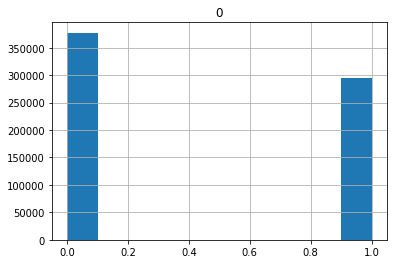

In [506]:
y_train1.hist()

### ROC Curve

In [507]:
y_scores_RF = model_rf.predict_proba(X_test)

In [508]:
y_scores_RF = y_scores_RF[:,1]

In [509]:
rf_recall = recall_score(y_test, y_pred)
rf_recall

0.6179392524632882

In [510]:
r_a_score_RF = roc_auc_score(y_test, y_scores)
r_a_score_RF

0.7125164023473654

### Prediction

#### Example 1

** If, as an emergency service, are receiving a call on the 31st of December, at 18 pm, calling to report an accident that happened out of a agglomeration, in the department 13 (around Marseille), on a departemental road.**

In [511]:
model_rf.predict(np.array([[12, 31, 18, 1, 13, 3]]))

array([0], dtype=int64)

#### Example 2

** However, if we receive a call from someone on the 5th of July, at 6 am, for an accident that happened in an agglomeration, out of an intersection, in the department 26, on a parking lot. **

In [512]:
model_rf.predict(np.array([[7, 5, 6, 2, 26, 6]]))

array([0], dtype=int64)

## Logistic Regression

In [513]:
# import library
from sklearn.linear_model import LogisticRegression
# training
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

LogisticRegression(C=0.01)

In [514]:
t0=time.time()
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
score = accuracy_score(y_test,y_pred_LR)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.6506068560748108
Time taken : 9.046783685684204


In [515]:
yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

# jaccard
jaccard_lr = jaccard_score(y_test, yhat_lr)
print("LR Jaccard index: ", jaccard_lr)

# f1_score
f1_score_lr = f1_score(y_test, yhat_lr, average='weighted')
print("LR F1-score: ", f1_score_lr)

# logloss
logloss_lr = log_loss(y_test, yhat_lr_prob)
print("LR log loss: ", logloss_lr)

LR Jaccard index:  0.3669434857635893
LR F1-score:  0.6393996168996818
LR log loss:  0.6423204595980727


In [516]:
yhat_lr = pd.DataFrame(yhat_lr)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

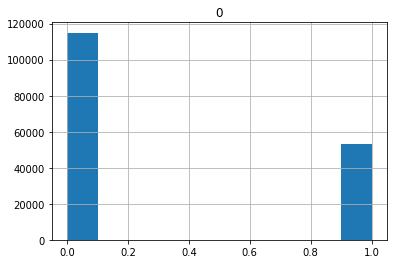

In [517]:
yhat_lr.hist()

### Confusion Matrix, Precision & Recall


In [518]:
confusion_matrix(y_test, y_pred_LR)

array([[75277, 19038],
       [39659, 34023]], dtype=int64)

In [519]:
precision_lr = precision_score(y_test, y_pred_LR)
precision_lr

0.6412054050997908

In [520]:
lr_recall_score = recall_score(y_test, y_pred_LR)
lr_recall_score

0.461754566922722

## ROC Curve

In [521]:
y_scores_LR = LR.predict_proba(X_test)

In [522]:
y_scores_LR = y_scores_LR[:,1]

In [523]:
lr_recall = recall_score(y_test, y_pred)
lr_recall

0.6179392524632882

In [524]:
r_a_score_LR = roc_auc_score(y_test, y_scores_LR)
r_a_score_LR

0.6508746348416763

In [525]:
#Jaccard report
report = pd.DataFrame(data=np.array([["RandomForest", jaccard_rf, f1_score_rf, logloss_rf],
                                    ["LogisticRegression", jaccard_lr, f1_score_lr, logloss_lr]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
RandomForest,0.44011558389796734,0.6647259012673726,0.9144198556890203
LogisticRegression,0.3669434857635893,0.6393996168996818,0.6423204595980727


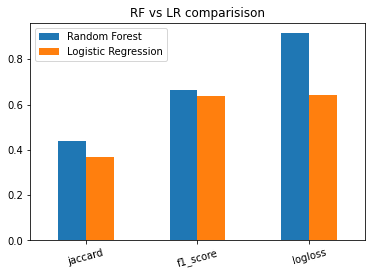

In [526]:
# A python dictionary
report = {"Random Forest":[jaccard_rf, f1_score_rf, logloss_rf],

        "Logistic Regression":[jaccard_lr, f1_score_lr, logloss_lr],

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=report, index=["jaccard", "f1_score", "logloss"])

# Draw a vertical bar chart

dataFrame.plot.bar(rot=15, title="RF vs LR comparisison")

plt.show(block=True)

In [527]:
report2 = pd.DataFrame(data=np.array([["RandomForest",r_a_score_RF],
                                    ["LogisticRegression", r_a_score_LR]]), columns=["Algorithm", "ROC"])
report2 = report2.set_index(["Algorithm", "ROC"])
report2

,
Algorithm,ROC
RandomForest,0.7125164023473654
LogisticRegression,0.6508746348416763


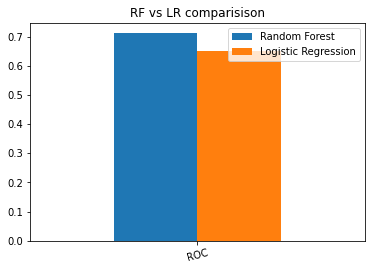

In [528]:
# A python dictionary
report2 = {"Random Forest":[r_a_score_RF],

        "Logistic Regression":[r_a_score_LR],

        };

# Dictionary loaded into a DataFrame       

dataFrame1 = pd.DataFrame(data=report2, index=["ROC"])

# Draw a vertical bar chart

dataFrame1.plot.bar(rot=15, title="RF vs LR comparisison")

plt.show(block=True)